In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Simple model problem

We aim at solving the differential equation
$$ u = u (1-u) $$
We will try different methods as follows

## Forward Euler Method
We will use the following discrete approximation for the ODE
$$ \left[ D^+_t u = u (1-u) \right]^n $$ 
Thus we can write
$$  u^{n+1} = \Delta t \cdot u^n (1-u^n) + u^n  $$ 

In [15]:
def getU(u,t):
    return dt * u * (1-u) + u

def run(u_0):
    uList[0] = u_0
    for (i,t) in enumerate(tList[1:]):
        uList[i+1] = getU(uList[i],t)

In [18]:
dt = 0.1
tEnd = 10
tList = np.arange(0,tEnd,dt)
uList = np.zeros(tList.shape[0])

u_0 = 0.4
run(u_0)

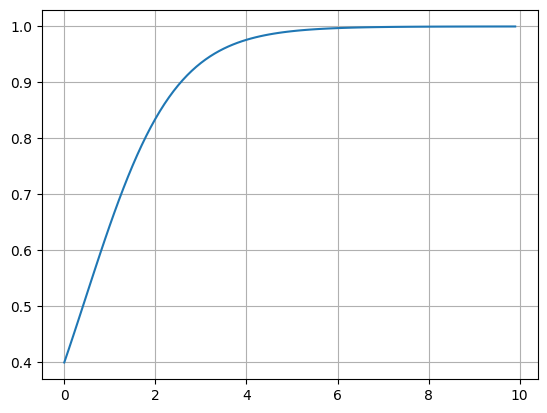

In [20]:
plt.plot(tList,uList)
plt.grid()

## Backward Euler Method
Since the RHS of the ODE is non-linear, then the backward Euler method will not result in a linear system of equation, but we will get a non-linear system of algebraic equations, for which we can use different methods to solve, like Newton's method, Picard's iteration, etc. The discretization by the backward Euler approximation is
$$  \left[ D_t^- u = u(1-u) \right]^n  $$
This will result in
$$ u^n - \Delta t \cdot u^n (1-u^n) = u^{n-1} $$
where by denoting $ u^n $ by $u$ and denoting $u^{n-1}$ by $u^{(1)}$ we will get the following quadratic equation
$$ \Delta t \cdot u^2 + u(1-\Delta t) - u^{(1)} = 0 $$ 

In [71]:
u, dt, u_ = sym.symbols("u dt u_")
r_1,r_2 = sym.solve(dt*u**2 + u*(1-dt)-u_,u)
sym.series(r_1,dt)

-1/dt + 1 - u_ + dt*((4*u_ - 2)**2/16 - 1/4) + dt**2*(u_/2 - (4*u_ - 2)**3/32 - 1/4) + dt**3*(5*(4*u_ - 2)**4/256 - (4*u_ - 2)**2/32 - (4*u_ - 2)*(8*u_ - 4)/32 + 1/16) + dt**4*(-3*u_/8 - 7*(4*u_ - 2)**5/512 + 5*(4*u_ - 2)**3/256 + 5*(4*u_ - 2)*((4*u_ - 2)**2 + (4*u_ - 2)*(8*u_ - 4))/256 + 3/16) + dt**5*(21*(4*u_ - 2)**6/2048 - 7*(4*u_ - 2)**4/512 + 5*(4*u_ - 2)**2/256 + 5*(4*u_ - 2)*(8*u_ - 4)/256 + 5*(4*u_ - 2)*(12*u_ - 6)/256 - 7*(4*u_ - 2)*((4*u_ - 2)**3 + (4*u_ - 2)*((4*u_ - 2)**2 + (4*u_ - 2)*(8*u_ - 4)))/512 - 1/32) + O(dt**6)

In [72]:
sym.series(r_2,dt)

u_ + dt*(1/4 - (4*u_ - 2)**2/16) + dt**2*(-u_/2 + (4*u_ - 2)**3/32 + 1/4) + dt**3*(-5*(4*u_ - 2)**4/256 + (4*u_ - 2)**2/32 + (4*u_ - 2)*(8*u_ - 4)/32 - 1/16) + dt**4*(3*u_/8 + 7*(4*u_ - 2)**5/512 - 5*(4*u_ - 2)**3/256 - 5*(4*u_ - 2)*((4*u_ - 2)**2 + (4*u_ - 2)*(8*u_ - 4))/256 - 3/16) + dt**5*(-21*(4*u_ - 2)**6/2048 + 7*(4*u_ - 2)**4/512 - 5*(4*u_ - 2)**2/256 - 5*(4*u_ - 2)*(8*u_ - 4)/256 - 5*(4*u_ - 2)*(12*u_ - 6)/256 + 7*(4*u_ - 2)*((4*u_ - 2)**3 + (4*u_ - 2)*((4*u_ - 2)**2 + (4*u_ - 2)*(8*u_ - 4)))/512 + 1/32) + O(dt**6)

As we can see above, the quadratic equation of interest has two solutions. However, the series expansion of the solutoin $r_1$ shows that it diverges as $\Delta t \to \infty$. So we choose the other solution as it does not behave strangly. So the solution of the equation above is given as

In [73]:
r_2

(dt + sqrt(dt**2 + 4*dt*u_ - 2*dt + 1) - 1)/(2*dt)

In [74]:
def getU_backwardEuler(u,t):
    return (dt + np.sqrt(dt**2 + 4*dt*u - 2*dt + 1) - 1)/(2*dt)

def run_backwardEuler(u_0):
    uList[0] = u_0
    for (i,t) in enumerate(tList[1:]):
        uList[i+1] = getU_backwardEuler(uList[i],t)

In [75]:
dt = 0.1
tEnd = 10
tList = np.arange(0,tEnd,dt)
uList = np.zeros(tList.shape[0])

u_0 = 0.4
run_backwardEuler(u_0)

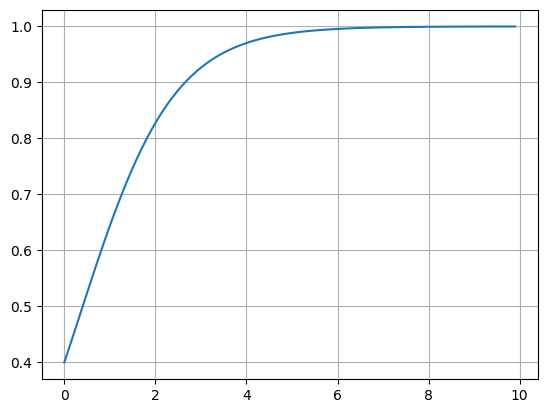

In [77]:
plt.plot(tList,uList)
plt.grid()

## Linearization: Picard Iteration
The idea of the Picard iteration (that goes under many names: fixed-point iteration, the method of successive substitutition, non-linear richardson iteration, and Picard iteration) is that we manually linearize a non-linear equaitions by using the approximation. Assume we want to solve the algebraic equation
$$ u^2 + u - 1 = 0. $$
The solution set of this equation is the same as the zero set of the function $ F: \mathbb{R} \to \mathbb{R} $ given as
$$ F(u) = u^2 + u - 1. $$ 

Let $u_k$ be an approximation of the solution of the algebraic equation, which is the zero set of $\tilde{F}_{u_k}:\mathbb{R} \to \mathbb{R}$ given by 
$$ \tilde{F}_{u_k}(u) = u_k u + u - 1 $$
We assume the zero set of this function is a better approximation to $u$ which we call it $u_{k+1}$
$$ u_{k+1} = \frac{1}{1+u_k} $$

So we write down another function $ F_{u_{k+1}}:\mathbb{R} \to \mathbb{R} $ the same as above which its zero set is a better approximation for $u$ (or at least we wish it be so). In a nutshell, we define the following iterative map
$$ u_{k+1} = G(u_k) $$
where $G: \mathbb{R}\to\mathbb{R}$ is given by $G(x) = 1/(1+x)$. For this particular example, from the theory of discrete maps in dynamical systems, we can easily see that the solution of the original equation is a stable fixed point for this map.

In [192]:
def getU_PicardIteration(u_old, u_guess, t, tol = 1E-3):
    for i in range(100):
        u = u_old/((1-dt)+dt*u_guess)
        if (np.abs(u-u_guess) < tol):
            return u
        else:
            u_guess = u
    return u

def run_PicardIteration(u_0):
    uList[0] = u_0
    for (i,t) in enumerate(tList[1:]):
        uList[i+1] = getU_PicardIteration(uList[i],uList[i],t)


In [190]:
dt = 0.1
tEnd = 10
tList = np.arange(0,tEnd,dt)
uList = np.zeros(tList.shape[0])

u_0 = 0.4
run_PicardIteration(u_0)

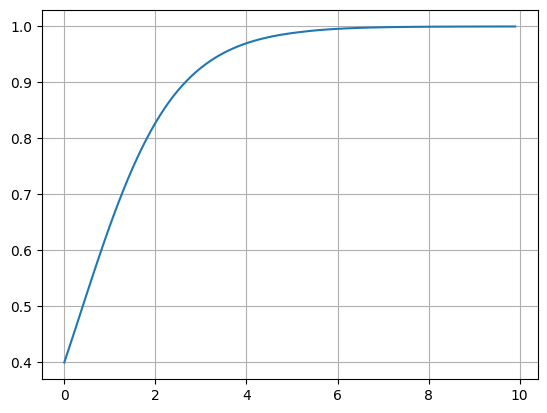

In [191]:
plt.plot(tList,uList)
plt.grid()

## Linearization: By a Geometric Mean
Consider the following Crank-Nicolson method applied to the ODE of interest
$$ \left[ D_t u = u(1-u) \right]^{n+1/2} $$
which will result in 
$$ \frac{u^{n+1} - u^n}{\Delta t} = u^{n+1/2} - (u^{n+1/2})^2 $$
For the two terms in the right hand side, for the first term we use the arithmetic mean and for the second term we use the geometric mean, thus we will get
$$ \frac{u^{n+1} - u^{n}}{\Delta t} = 1/2(u^{n+1}+u^n) + u^{n+1}u^{n}$$

Which will lead to 
$$ u^{n+1} = \frac{1+\Delta t / 2}{u^n \Delta t + (1-\Delta t /2)} u^n $$

In [211]:
def getU_GeomMean(u, t):
    return (1+dt/2)/(u*dt + (1-dt/2)) * u

def run_GeomMean(u_0):
    uList[0] = u_0
    for (i,t) in enumerate(tList[1:]):
        uList[i+1] = getU_GeomMean(uList[i],t)


In [212]:
dt = 0.1
tEnd = 10
tList = np.arange(0,tEnd,dt)
uList = np.zeros(tList.shape[0])

u_0 = 0.4
run_GeomMean(u_0)

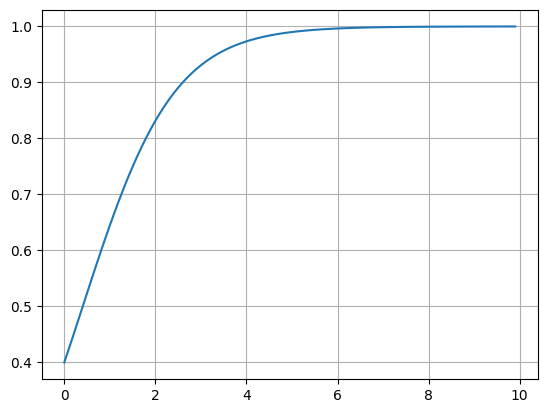

In [214]:
plt.plot(tList,uList)
plt.grid()

## Newton's Method
Assume that we want to solve the following equation
$$ 
One iterative way to solve this equation is the use
$$ u_{k+1} = u_k - \frac{F(u_k)}{F'(u_k)}, $$
which is known as the Newton's method. There many derivations of this iterative map, among which my favorite is the geometric discription. Let $u_k$ be an approximate solution to the algebraic equation $F(u)=0$. To get a better approximation, draw a straight line from $(u_k, F(u_k))$ with slope $F'(u_k)$ and find the point that this line intersects the x-axis as a better approximation. This gives rise to the Newton iteration above.F(u) = 0. $$

In [234]:
def getU_NewtonMethod(u_old, t, tol = 1E-3):
    u_guess = u_old
    for i in range(100):
        u = u_guess - (dt*u_guess**2 + u_guess*(1-dt) - u_old)/(2*dt*u_guess + (1-dt))
        if (np.abs(u-u_guess) < tol):
            return u
        else:
            u_guess = u
    return u

def run_NewtonMethod(u_0):
    uList[0] = u_0
    for (i,t) in enumerate(tList[1:]):
        uList[i+1] = getU_NewtonMethod(uList[i],t)

In [235]:
dt = 0.1
tEnd = 10
tList = np.arange(0,tEnd,dt)
uList = np.zeros(tList.shape[0])

u_0 = 0.4
run_NewtonMethod(u_0)

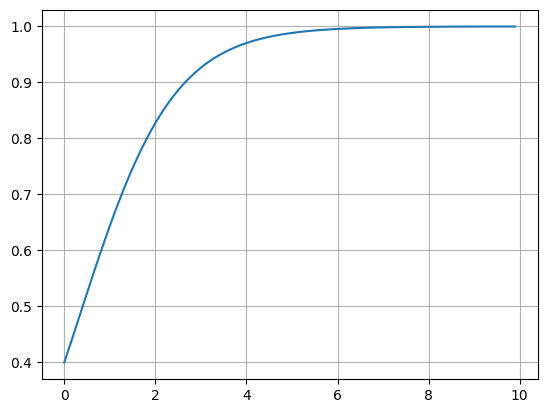

In [236]:
plt.plot(tList,uList)
plt.grid()

# General Case Non linear ODE Systems 
A system of ODEs can be written in the form
$$ \dot{U} = F(U,t), $$
where $U = U(t)$ and $U \in \mathbb{R}^n$. To solve this ODE system implicitly, we need to do two steps: 1) Discretization (using Backward Euler or Crank-Nicolson) and then 2) Solving the non-linear system of equation (using Picard iteration, or Newton's method)

### Backward Euler: Discretization
Discretizing using the Backward Euler
$$ \left[ D_t^- U = F(U,t) \right]^n $$
which will lead to
$$ \frac{u^{n}-u^{n-1}}{\Delta t} = F(u^n,t_n) \implies u^{n} - \Delta t F(u^n,t_n) - u^{n-1} = 0 $$


### Crank-Nicolson Discretization
We will use the Crank-Nicoloson discretization as follows
$$ \left[ D_t U = F(U,t) \right]^{n+1/2} $$
Which will result in
$$ \frac{U^{n+1}-U^n}{\Delta t} = \frac12 (F(U^{n+1},t)+F(U^n,t)) \implies U^{n+1} - \frac{\Delta t}{2}F(U^{n+1},t) - \frac{\Delta t}{2}F(U^{n},t) - U^n  = 0. $$

After the discretization by one of the implicit methods, we will need to sovle the resulting system of non-linear equations. 
### Picard Iteration:
Only can be used if the non-linear equation is of the type like
$$ A(u) u = b(u). $$
Then we can turn it into the following linear equation and solve it iteratively.
$$ A(u^-) u = b(u^-) $$



### Newton's Method:
Writing the nonlinear equation in the form of $ F(u) = 0 $, the Newton's iteration will be
$$ u^{k+1} = u^{k} + \delta u^k $$
where
$$ J \delta u^k = - F(u^k). $$
In other words
$$ u^{k+1} = u^k - J^{-1} F(u^k). $$

## SI Model:
Consider the following system of ODE equation
$$ S' = -\beta S I, \quad I' = \beta S I - \nu I. $$ 
We can write it more compactly in the form
$$ \begin{bmatrix}S' \\ I'\end{bmatrix} = 
\begin{bmatrix}
0 & -\beta S \\
\beta I & -\nu 
\end{bmatrix} 
\begin{bmatrix}S \\ I\end{bmatrix}
$$

Let $ u = [S \quad I]^T $. Thus the system of ODEs can be written as
$$ u' = A(u)u $$
By the backward Euler discretization we will have
$$ u^{n} - \Delta t A(u^n)u^n - u^{n-1} = 0 \implies (I - \Delta t A(u^n))u^n = u^{n-1}$$
or in a compact format
$$ B(u^n) u^n = u^{n-1} $$

#### Picard iteration method
we set
$$ B(u^-) u = u^- \implies u = (B(u^-))^{-1} u^- $$



In [375]:
def A_SIR(u):
    a11 = 0
    a12 = -beta*u[0]
    a21 = beta*u[1]
    a22 = -nu
    return np.array([[a11,a12],[a21,a22]])

def A_Harmonic(u):
    a11 = 0
    a12 = 1
    a21 = -1
    a22 = 0
    return np.array([[a11,a12],[a21,a22]])


def A_vanDerPoll(u):
    a11 = mu - mu/3*u[0]**2
    a12 = -mu
    a21 = 1/mu
    a22 = 0
    return np.array([[a11,a12],[a21,a22]])    
    
def B(u):
    return np.eye(2) - dt*A_vanDerPoll(u)
    

def getU_SystemPicard(u_guess, t, tol = 1E-1):
    u_0 = u_guess.copy()
    for i in range(100):
        u = np.linalg.solve(B(u_guess),u_guess)
        if (np.linalg.norm(u-u_guess)/np.linalg.norm(u_0) < tol):
            return u
        else:
            u_guess = u.copy()
    return u

def run_SystemPicard(u_0):
    uList[0,:] = u_0
    for (i,t) in enumerate(tList[1:]):
        uList[i+1,:] = getU_SystemPicard(uList[i,:],t)

In [376]:
dt = 0.01
tEnd = 50
tList = np.arange(0,tEnd,dt)
uList = np.zeros((tList.shape[0],2))

## Parameters for the SI model
beta = 1
nu = 0.5

## Parameters for the Van Der Poll Model
mu = 0.6

u_0 = np.array([3,0.2])
run_SystemPicard(u_0)

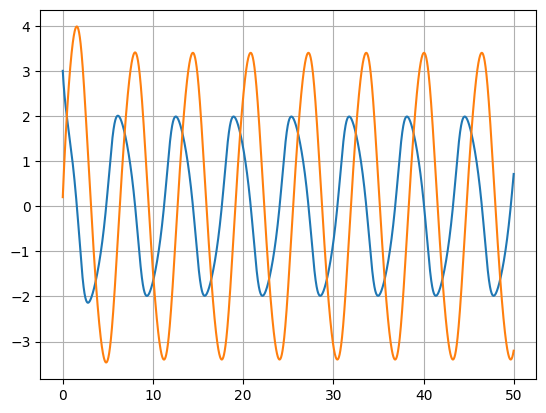

In [377]:
plt.plot(tList,uList[:,0])
plt.plot(tList,uList[:,1])
plt.grid()

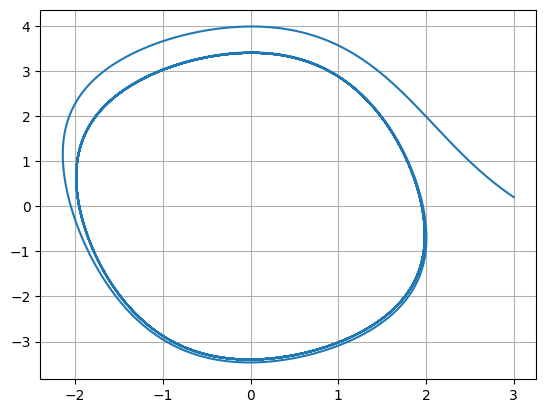

In [378]:
plt.plot(uList[:,0],uList[:,1])
plt.grid()

#### Newton's method
Writing the nonlinear equation in the form of $ F(u) = 0 $, the Newton's iteration will be
$$ u^{k+1} = u^{k} + \delta u^k $$
where
$$ J \delta u^k = - F(u^k). $$
In other words
$$ u^{k+1} = u^k - J^{-1} F(u^k). $$


In [417]:
def J(u):
    a11_u1 = 0
    a12_u1 = 0
    a21_u1 = 0
    a22_u1 = 0
    a11_u2 = 0
    a12_u2 = 0
    a21_u2 = 0
    a22_u2 = 0
    a11 = 0
    a12 = 1
    a21 = -1
    a22 = 0

    J11 = 1-dt*(a11_u1*u[0] + a11 + u[1]*a12_u1)
    J12 = -dt*(a11_u2*u[0] + a12_u2*u[1] + a12)
    J21 = -dt*(a21_u1*u[0] + a22_u1*u[1] + a21)
    J22 = 1-dt*(a21_u2*u[0] + a22 + u[1]*a22_u2)
    return np.array([[J11,J12],[J21,J22]])


def J_VanderPoll(u):
    a11_u1 = -2/3*u[0]
    a12_u1 = 0
    a21_u1 = 0
    a22_u1 = 0
    a11_u2 = 0
    a12_u2 = 0
    a21_u2 = 0
    a22_u2 = 0
    a11 = mu*(1-1/3*u[0]**2)
    a12 = -mu
    a21 = 1/mu
    a22 = 0

    J11 = 1-dt*(a11_u1*u[0] + a11 + u[1]*a12_u1)
    J12 = -dt*(a11_u2*u[0] + a12_u2*u[1] + a12)
    J21 = -dt*(a21_u1*u[0] + a22_u1*u[1] + a21)
    J22 = 1-dt*(a21_u2*u[0] + a22 + u[1]*a22_u2)
    return np.array([[J11,J12],[J21,J22]])

def A(u):
    a11 = 0
    a12 = 1
    a21 = -1
    a22 = 0
    return np.array([[a11,a12],[a21,a22]])

def A_VanderPoll(u):
    a11 = mu*(1-1/3*u[0]**2)
    a12 = -mu
    a21 = 1/mu
    a22 = 0
    return np.array([[a11,a12],[a21,a22]])
    

def F(u, u_pre):
    return u - dt*np.matmul(A_VanderPoll(u),u) - u_pre


def getU_SystemNewton(u_guess, t, tol = 1E-1):
    u_0 = u_guess.copy()
    for i in range(100):
        u = u_guess - np.linalg.solve(J_VanderPoll(u_guess),F(u_guess,u_0))
        if (np.linalg.norm(u-u_guess)/np.linalg.norm(u_0) < tol):
            return u
        else:
            u_guess = u.copy()
    return u

def run_SystemNewton(u_0):
    uList[0,:] = u_0
    for (i,t) in enumerate(tList[1:]):
        uList[i+1,:] = getU_SystemNewton(uList[i,:],t)

In [421]:
dt = 0.001
tEnd = 20
tList = np.arange(0,tEnd,dt)
uList = np.zeros((tList.shape[0],2))

## Parameters for the SI model
beta = 1
nu = 0.5

## Parameters for the Van Der Poll Model
mu = 0.6

u_0 = np.array([3,0.2])
run_SystemNewton(u_0)

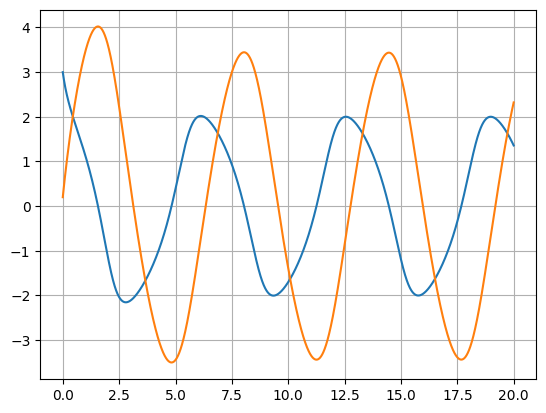

In [422]:
plt.plot(tList,uList[:,0])
plt.plot(tList,uList[:,1])
plt.grid()

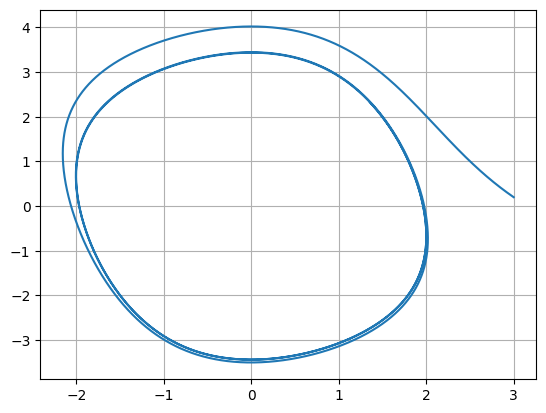

In [423]:
plt.plot(uList[:,0],uList[:,1])
plt.grid()

### Example: Crank-Nicolson Discretization + Picard Iteration
Assume that the ODE system of interest is given as
$$ \dot{u} = A(u) u $$
where $u = u(t) \in \mathbb{R}^n$ and $A$ is an $n\times n$ matrix. Discretization by the Crank-Nicoloson will give
$$ u^{n+1} - \frac{\Delta t}{2}\left( A(u^{n+1})u^{n+1} + A(u^n)u^n \right) - u^n = 0. $$

To solve the non-linear system of equations above, We use the Picard iteration. So denoting the solution at time $n+1$ by $u$, and our initial guess for this value as $u^-$ (which we will set as the value computed at the previous time step) we will get
$$ u - \frac{\Delta t}{2}\left( A(u)u + A(u^{(1)})u^{(1)} \right) - u^{(1)} = 0. $$

To do the Picard iteration we set 
$$ u - \frac{\Delta t}{2}\left( A(u^{-})u + A(u^{(1)})u^{(1)} \right) - u^{(1)} = 0. $$

$$ (I - \frac{\Delta t}{2}A(u^-))u = \frac{\Delta t}{2}A(u^{(1)})u^{(1)}+u^{(1)} \implies u= \left[ I - \frac{\Delta t}{2}A(u^-) \right]^{-1}\left(  \frac{\Delta t}{2}A(u^{(1)})u^{(1)}+u^{(1)} \right)$$

In [435]:
def A_VanderPoll(u):
    a11 = mu*(1-1/3*u[0]**2)
    a12 = -mu
    a21 = 1/mu
    a22 = 0
    return np.array([[a11,a12],[a21,a22]])

def getU_SystemPicard_Crank(u_guess, t, tol = 1E-1):
    u_pre = u_guess.copy()
    for i in range(100):
        u = np.linalg.solve(np.eye(2)-dt/2*A_VanderPoll(u_guess),dt/2*np.matmul(A_VanderPoll(u_pre),u_pre)+u_pre)
        if (np.linalg.norm(u-u_guess)/np.linalg.norm(u_pre) < tol):
            return u
        else:
            u_guess = u.copy()
    return u

def run_SystemPicard_Crank(u_0):
    uList[0,:] = u_0
    for (i,t) in enumerate(tList[1:]):
        uList[i+1,:] = getU_SystemNewton(uList[i,:],t)


In [436]:
dt = 0.001
tEnd = 20
tList = np.arange(0,tEnd,dt)
uList = np.zeros((tList.shape[0],2))

## Parameters for the Van Der Poll Model
mu = 0.7

u_0 = np.array([3,0.2])
run_SystemPicard_Crank(u_0)

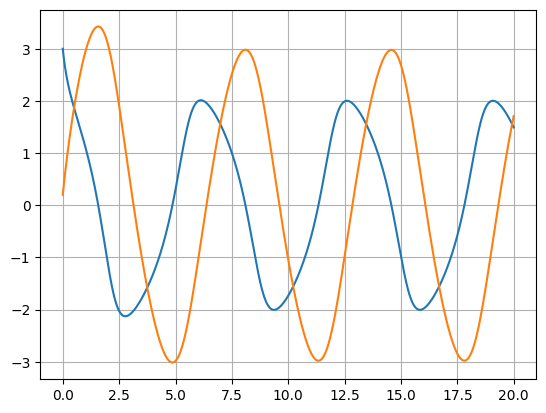

In [437]:
plt.plot(tList,uList[:,0])
plt.plot(tList,uList[:,1])
plt.grid()

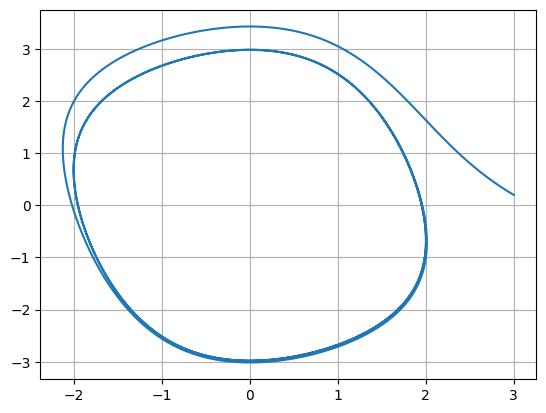

In [438]:
plt.plot(uList[:,0],uList[:,1])
plt.grid()

## Playground